
<a href="https://colab.research.google.com/github/kokchun/Machine-learning-AI22/blob/main/Exercises/E01_gradient_descent.ipynb" target="_parent"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp; to see hints and answers.

---
# Gradient descent exercises

---
These are introductory exercises in Machine learning with focus in **gradient descent** .

<p class = "alert alert-info" role="alert"><b>Note</b> all datasets used in this exercise can be found under Data folder of the course Github repo</p>

<p class = "alert alert-info" role="alert"><b>Note</b> that in cases when you start to repeat code, try not to. Create functions to reuse code instead. </p>

<p class = "alert alert-info" role="alert"><b>Remember</b> to use <b>descriptive variable, function, index </b> and <b> column names</b> in order to get readable code </p>

The number of stars (\*), (\*\*), (\*\*\*) denotes the difficulty level of the task

---

## 0. Simulate dataset (*)

Simulate datasets according to these rules:

- set random seed to 42
- (1000,2) samples from $X \sim \mathcal{U}(0,1)$ , i.e. 1000 rows, 2 columns. 
- 1000 samples from $\epsilon \sim \mathcal{N}(0,1)$
- $y = 3x_1 + 5x_2 + 3 + \epsilon$ , where $x_i$ is column $i$ of $X$

Finally add a column of ones for the intercept to $X$.

<details>

<summary>Hint</summary>

Use for simulating X

´´´
np.random.rand(samples, 2)
´´´

to concatenate with ones, use ```np.c_[..., ...]```

</details>

<details>

<summary>Answer</summary>

```
array([[1.        , 0.37454012, 0.95071431],
       [1.        , 0.73199394, 0.59865848],
       [1.        , 0.15601864, 0.15599452],
       [1.        , 0.05808361, 0.86617615],
       [1.        , 0.60111501, 0.70807258]])

```

</details>

---

In [224]:
import numpy as np
np.random.seed(42)
n = 1000
# rand gives you a decimal while randint gives you a whole number
X = np.random.rand(n, 2)
e = np.random.normal(0,1,n)
y = 3*X[:,0] + 5*X[:,1] + 3 + e 
X = np.c_[np.ones(n), X]
X[:5,:]

array([[1.        , 0.37454012, 0.95071431],
       [1.        , 0.73199394, 0.59865848],
       [1.        , 0.15601864, 0.15599452],
       [1.        , 0.05808361, 0.86617615],
       [1.        , 0.60111501, 0.70807258]])

## 1. Gradient descent - learning rate (*)

Use gradient descent to calculate $\vec{\theta} = (\theta_0, \theta_1, \theta_2)^T$ 

&nbsp; a) Use $\eta = 0.1$ and calculate $\vec{\theta}$ for each fifth epoch from 1 to 500. So the procedure is as follows:
- calculate $\vec{\theta}$ for epochs = 1
- calculate $\vec{\theta}$ for epochs = 6
- ...
- calculate $\vec{\theta}$ for epochs = 496

Plot these $\vec{\theta}$ values against epochs. (*)

&nbsp; b) Do the same as for a) but with learning rate $\eta = 0.01$, 5000 epochs and for each 20th epoch. What do you notice when changing the learning rate? (*)

&nbsp; c) Experiment with larger and smaller $\eta$ and see what happens.

<details>

<summary>Answer</summary>

a) 

<img src="../assets/grad_desc_converg.png" height="200"/>

b) 

<img src="../assets/grad_desc_converg_001.png" height="200"/>

</details>

---

In [225]:
def gradient_descent(X, y, learning_rate = .1, iterations = 500):
    m = len(X)
    theta = np.random.randn(X.shape[1],1)
    #print(f"Initialize theta with randomized\n {theta}")

    for _ in range(iterations):
        gradient = 2/m*X.T@(X@theta-y)
        theta -= learning_rate*gradient
    return theta
# Remember to resahpe your y array 
theta = gradient_descent(X, y.reshape(-1,1))
theta.shape

(3, 1)

In [226]:
steps = range(1,500,5)
learning_rate = 0.1
thetas = [gradient_descent(X, y.reshape(-1,1), iterations=iteration, learning_rate=learning_rate).reshape(-1) for iteration in steps]
thetas = np.array(thetas)
thetas.shape

(100, 3)

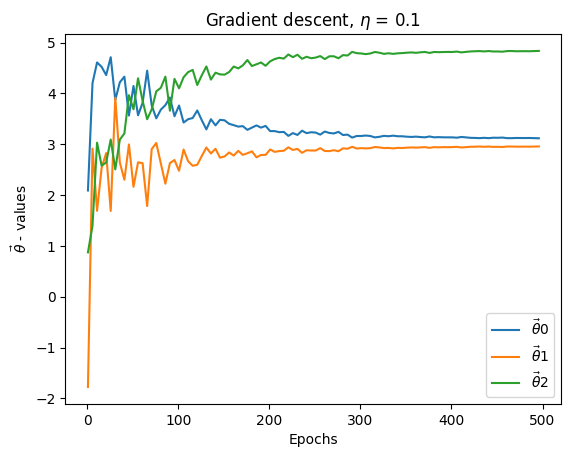

In [227]:
import matplotlib.pyplot as plt
fig, ax = plt.figure(dpi=100), plt.axes()
ax.plot(steps, thetas, label = [r"$\vec{\theta}$"+str(idx) for idx in range(thetas.shape[1]) ])
# one epoch is when algorithm seen the whole data once
ax.set(xlabel = "Epochs", ylabel = r"$\vec{\theta}$ - values", title=r"Gradient descent, $\eta$ = "+str(learning_rate))
ax.legend();

In [ ]:
# 5000 epochs but we only print one every 20 epochs 
# so the values are the same it's just les cluttered
# aka the 20 is the resolution we display
steps = range(1,5000,20)
learning_rate = 0.01
thetas = [gradient_descent(X, y.reshape(-1,1), iterations=iteration, learning_rate=learning_rate).reshape(-1) for iteration in steps]
thetas = np.array(thetas)
thetas.shape

(500, 3)

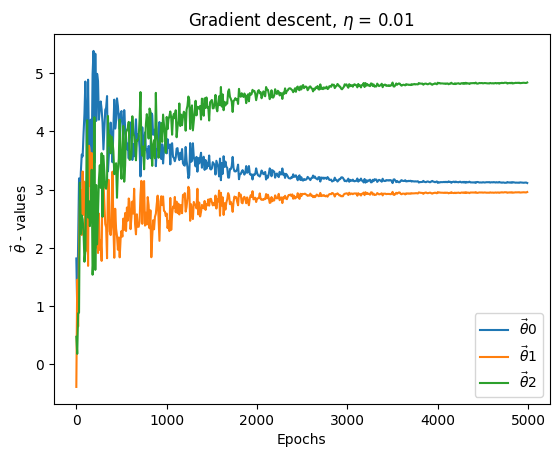

In [252]:
import matplotlib.pyplot as plt
fig, ax = plt.figure(dpi=100), plt.axes()
ax.plot(steps, thetas, label = [r"$\vec{\theta}$"+str(idx) for idx in range(thetas.shape[1]) ])
# one epoch is when algorithm seen the whole data once
ax.set(xlabel = "Epochs", ylabel = r"$\vec{\theta}$ - values", title=r"Gradient descent, $\eta$ = "+str(learning_rate))
ax.legend();

## 2. Stochastic Gradient Descent - learning rate (**)

Repeat task 1 but using stochastic gradient descent instead. Also adjust number of epochs to see if you can find convergence. What kind of conclusions can you draw from your experiments. (**)

---

In [239]:
import numpy as np
np.random.seed(42)
n = 1000
# rand gives you a decimal while randint gives you a whole number
X = np.random.rand(n, 2)
e = np.random.normal(0,1,n)
y = 3*X[:,0] + 5*X[:,1] + 3 + e 
X = np.c_[np.ones(n), X]
#y=y.reshape(-1,1)
#X=X[:,:-1]
X.shape, y.shape

((1000, 3), (1000,))

In [ ]:
# Stochastic Gradient Descent

# The learning rate has no effekt right now
def stochastic_gradient_descent(X, y, learning_rate = .1, iterations = 10):
    epochs = iterations
    # What should this be???
    t0, t1 = 5, 50

    # Should this have a t for every feature + bias?
    def learning_rate_schedulet(t):
        return t0/(t+t1)

    theta = np.random.randn(X.shape[1], 1)

    m = len(X)

    # Minskar lerning rate ju färr epocer och ju fler features
    for epoch in range(epochs):
        for i in range(m):
            random_index = np.random.randint(m)
            x_i = X[random_index:random_index+1]
            y_i = y[random_index:random_index+1]
            
            gradients = 2*x_i.T.dot(x_i.dot(theta)-y_i)
            eta = learning_rate_schedulet(epoch*m+i)
            theta -= eta*gradients
    return theta

In [ ]:
steps = range(1,50,1)
learning_rate = 0.01
# Don't forget to reshape y
thetas = [stochastic_gradient_descent(X, y.reshape(-1,1), iterations=iteration, learning_rate=learning_rate).reshape(-1) for iteration in steps]
thetas = np.array(thetas)
thetas.shape

(49, 3)

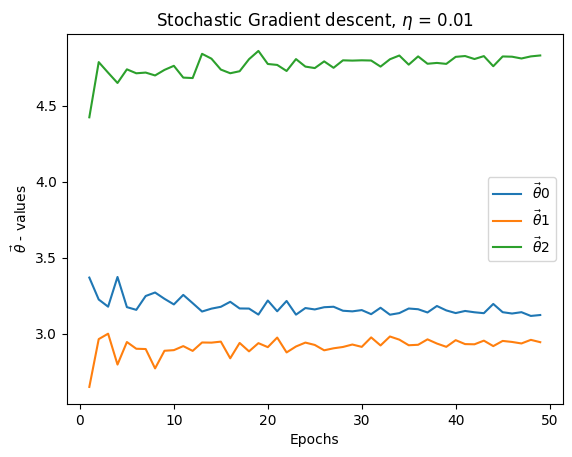

In [238]:
import matplotlib.pyplot as plt
fig, ax = plt.figure(dpi=100), plt.axes()
ax.plot(steps, thetas, label = [r"$\vec{\theta}$"+str(idx) for idx in range(thetas.shape[1]) ])
# one epoch is when algorithm seen the whole data once
ax.set(xlabel = "Epochs", ylabel = r"$\vec{\theta}$ - values", title=r"Stochastic Gradient descent, $\eta$ = "+str(learning_rate))
ax.legend();

## 3. Mini Batch Gradient Descent (**)

Now try different sizes of mini-batches and make some exploratory plots to see convergence. Also you can make comparison to the other algorithms by using same $\eta$ and same amount of epochs to see how they differ from each other in terms of convergence. (**)

In [ ]:
import numpy as np
np.random.seed(42)
n = 1000
# rand gives you a decimal while randint gives you a whole number
X = np.random.rand(n, 2)
e = np.random.normal(0,1,n)
y = 3*X[:,0] + 5*X[:,1] + 3 + e 
X = np.c_[np.ones(n), X]
X.shape, y.shape

In [ ]:
# The learning rate has no effekt right now
def mini_batch_gradient_descent(X, y, learning_rate=.1, iterations=10, batch_size=20):
    epochs = iterations
    
    # Gem replaces all this with learning rate 
    # are these perhaps weights???
    # What should this be???
    t0, t1 = 5, 50
    # Should this have a t for every feature + bias?
    def learning_rate_schedulet(t):
        return t0/(t+t1)

    theta = np.random.randn(X.shape[1], 1)

    m = len(X)

    # Minskar lerning rate ju färr epocer och ju fler features
    for epoch in range(epochs):
        for i in range(m):
            random_indices = np.random.choice(m, batch_size, replace=False) #select random batch
            xi = X[random_indices]
            yi = y[random_indices]

            gradients = 2/batch_size*xi.T.dot(xi.dot(theta)-yi)
            eta = learning_rate_schedulet(epoch*m+i)
            theta -= eta*gradients
    return theta

In [249]:
# Don't forget to reshape y
steps = range(1,15,1)
learning_rate = 0.01
thetas = [mini_batch_gradient_descent(X, y.reshape(-1,1), iterations=iteration, learning_rate=learning_rate).reshape(-1) for iteration in steps]
thetas = np.array(thetas)
thetas.shape

(14, 3)

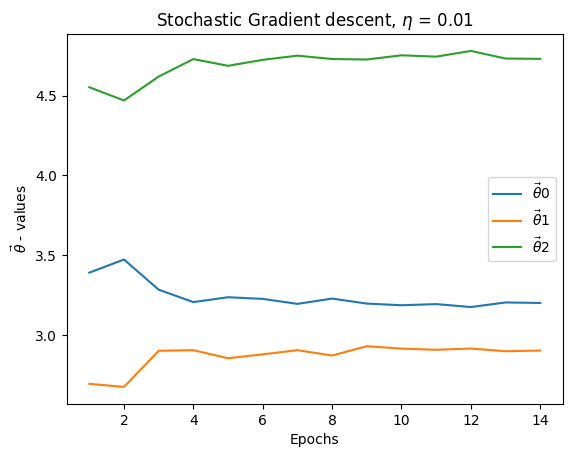

In [250]:
# one epoch is when algorithm seen the whole data once
import matplotlib.pyplot as plt
fig, ax = plt.figure(dpi=100), plt.axes()
ax.plot(steps, thetas, label = [r"$\vec{\theta}$"+str(idx) for idx in range(thetas.shape[1]) ])
ax.set(xlabel = "Epochs", ylabel = r"$\vec{\theta}$ - values", title=r"Stochastic Gradient descent, $\eta$ = "+str(learning_rate))
ax.legend();

---

Kokchun Giang

[LinkedIn][linkedIn_kokchun]

[GitHub portfolio][github_portfolio]

[linkedIn_kokchun]: https://www.linkedin.com/in/kokchungiang/
[github_portfolio]: https://github.com/kokchun/Portfolio-Kokchun-Giang

---